In [93]:
%pip install kneed
%pip install yellowbrick 
%pip install seaborn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_samples, silhouette_score 
from yellowbrick.cluster import SilhouetteVisualizer
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [85]:
 df = pd.read_csv('preprocessed_Diabetes.csv')

In [96]:
features = df.drop(df.columns [0] ,axis= 1)
scaler = StandardScaler()
scaledfeatures = scaler.fit_transform(features)
df_scaled = pd.DataFrame(scaledfeatures,columns = features.columns)
print('scaled dara frame')
print (df_scaled.head())

scaled dara frame
     HighBP  HighChol  CholCheck    Smoker    Stroke  HeartDiseaseorAttack  \
0  0.698638  0.857969   0.116248  1.152906 -0.217913             -0.432098   
1 -1.431356 -1.165543  -8.602325  1.152906 -0.217913             -0.432098   
2  0.698638  0.857969   0.116248 -0.867373 -0.217913             -0.432098   
3  0.698638 -1.165543   0.116248 -0.867373 -0.217913             -0.432098   
4  0.698638  0.857969   0.116248 -0.867373 -0.217913             -0.432098   

   PhysActivity    Fruits   Veggies  AnyHealthcare  NoDocbcCost   GenHlth  \
0     -1.029776 -0.971085  0.578377       0.231021    -0.436436  1.953176   
1      0.971085 -0.971085 -1.728977      -4.328607     2.291288 -0.300489   
2     -1.029776  1.029776 -1.728977       0.231021     2.291288  1.953176   
3      0.971085  1.029776  0.578377       0.231021    -0.436436 -1.427321   
4      0.971085  1.029776  0.578377       0.231021    -0.436436 -1.427321   

   DiffWalk       Sex       Age  Education  Discre

In [113]:
np.random.seed(42)

In [125]:
inertia_values = []
k_value = range(1,11)
for k in k_value :
    Kmeans = KMeans(n_clusters = k,random_state = 42 ,n_init=10)
    k_result =Kmeans.fit(df_scaled)
    inertia_values.append(Kmeans.inertia_)

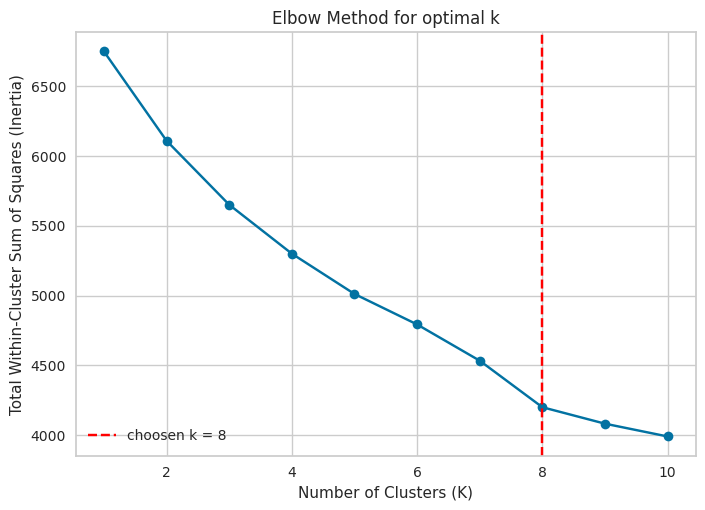

In [126]:
plt.plot(k_value,inertia_values , marker = 'o' )
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Total Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for optimal k')
plt.axvline(x= 8 , linestyle = '--', color = 'red', label = 'choosen k = 8 ')
plt.legend()
plt.show()


In [127]:
# Perform k-means clustering with different values of k
k_values = range(2,11)
silhouette_avg_values = []
for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42,n_init=10 )
  kmeans_result = kmeans.fit(df_scaled)
  silhouette_avg = silhouette_score(df_scaled, kmeans_result.labels_)
  silhouette_avg_values.append(silhouette_avg)


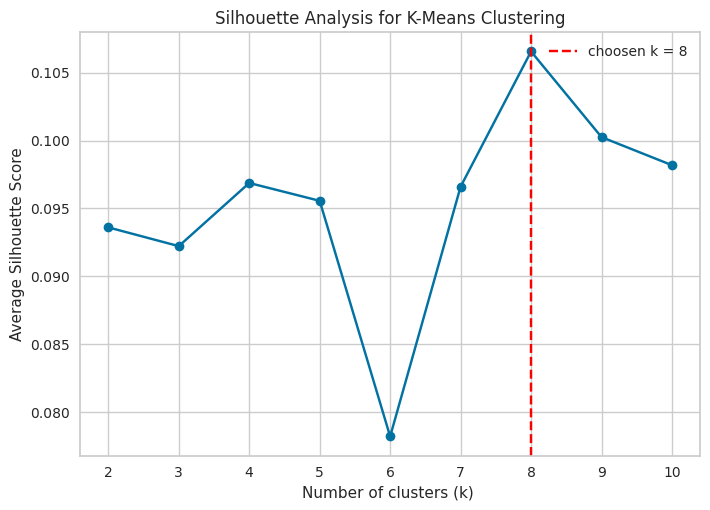

In [128]:
# Plot the silhouette scores for different values of k
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering') 
plt.xlabel( 'Number of clusters (k) ') 
plt.ylabel( 'Average Silhouette Score')
plt.axvline(x= 8 , linestyle = '--', color = 'red', label = 'choosen k = 8')
plt.legend()
plt.show()

/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


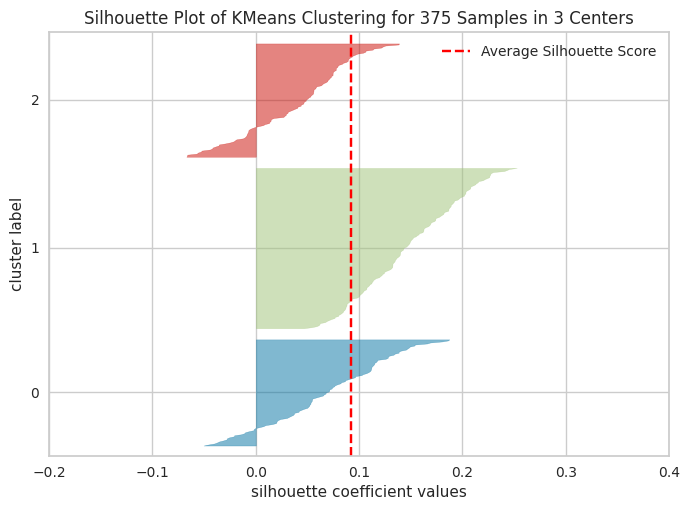

/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


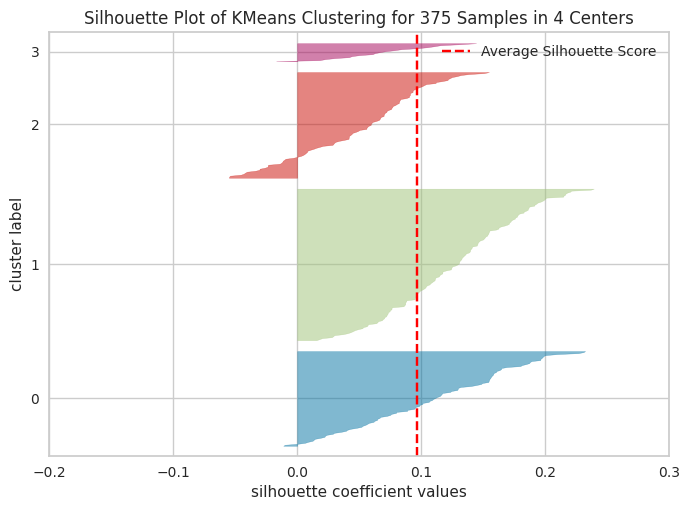

/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


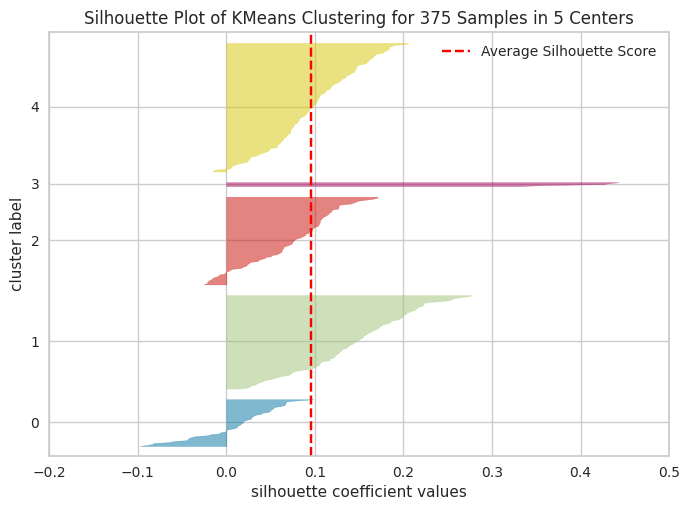

/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


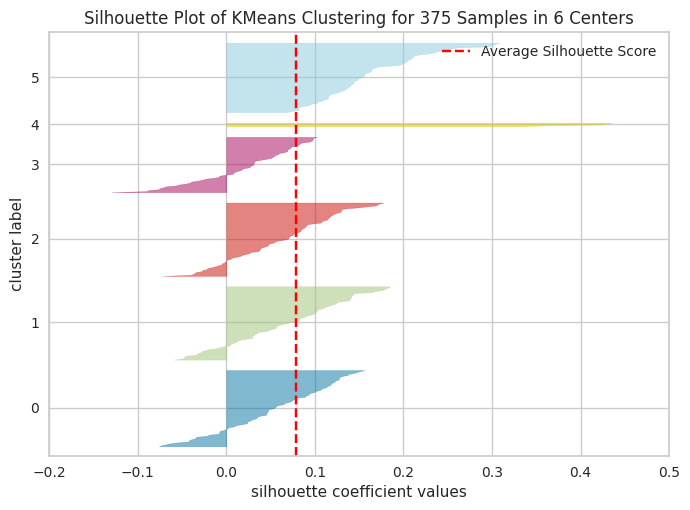

In [129]:
k_values = range(3,7)
for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42,n_init=10 )
  kmeans_result = kmeans.fit(df_scaled)
  visualizer = SilhouetteVisualizer(kmeans, colors = 'yellowbrick')
  visualizer.fit(df_scaled) 
  visualizer.show()